In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score,mean_absolute_error
from sklearn import metrics

In [105]:
df=pd.read_csv('movie_metadata.csv')


In [106]:
pd.set_option('display.max_columns',None)

In [107]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [108]:
df.shape

(5043, 28)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [110]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [111]:
df.describe

<bound method NDFrame.describe of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   

In [112]:
df.nunique()
# to display total number of variables present in the data frame columns

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       46
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [113]:
df['language'].value_counts()
# english is only in majority

language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Danish           5
Arabic           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Icelandic        2
Aboriginal       2
Indonesian       2
Zulu             2
Romanian         2
Dari             2
Panjabi          1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Urdu             1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: count, dtype: int64

In [114]:
df['movie_title']
# dislplay all the movie names

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [115]:
df.movie_title[df.language=='Hindi']
# to display the name of hingi movies

1056                                 Earth 
3075                Kabhi Alvida Naa Kehna 
3085                             Housefull 
3208                                Krrish 
3276                      Jab Tak Hai Jaan 
3344                       My Name Is Khan 
3348                       Namastey London 
3350               Yeh Jawaani Hai Deewani 
3455                         Ta Ra Rum Pum 
3510                            Veer-Zaara 
3665                           Khiladi 786 
3685                       Rang De Basanti 
3695                         Dum Maaro Dum 
3789                     Gandhi, My Father 
3866                                 Fugly 
3870                               Airlift 
3877                                   Paa 
4088                                 Water 
4160                  Lage Raho Munna Bhai 
4299                Hum To Mohabbat Karega 
4305                        Roadside Romeo 
4351             ABCD (Any Body Can Dance) 
4385                          Th

In [116]:
bw=df[df.language=='Hindi']
# Saving the hindi movies in a separate dataframe for further analysis

In [117]:
bw
# dataframe of all hindi movies with imdb scores

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1056,Color,Deepa Mehta,34.0,110.0,375.0,59.0,Gulshan Grover,113.0,528972.0,Drama|Romance|War,Nandita Das,Earth,5639,371,Eric Peterson,0.0,friend|hindu|india|muslim|sikh,http://www.imdb.com/title/tt0150433/?ref_=fn_t...,55.0,Hindi,India,Unrated,NaN,1998.0,102.0,7.8,NaN,522
3075,Color,Karan Johar,20.0,193.0,160.0,860.0,John Abraham,8000.0,3275443.0,Drama,Shah Rukh Khan,Kabhi Alvida Naa Kehna,13998,10822,Preity Zinta,2.0,extramarital affair|fashion magazine editor|ma...,http://www.imdb.com/title/tt0449999/?ref_=fn_t...,264.0,Hindi,India,R,700000000.0,2006.0,1000.0,6.0,2.35,659
3085,Color,Sajid Khan,10.0,144.0,0.0,119.0,Boman Irani,564.0,1165104.0,Comedy,Arjun Rampal,Housefull,8598,1121,Riteish Deshmukh,5.0,bad luck|casino|lie|mix up|stutter,http://www.imdb.com/title/tt1573072/?ref_=fn_t...,43.0,Hindi,India,NaN,NaN,2010.0,154.0,5.3,NaN,250
3208,Color,Rakesh Roshan,20.0,168.0,53.0,45.0,Rekha,307.0,NaN,Action|Adventure|Romance|Sci-Fi,Naseeruddin Shah,Krrish,12411,616,Sharat Saxena,0.0,breaking the fourth wall|breaking the fourth w...,http://www.imdb.com/title/tt0432637/?ref_=fn_t...,110.0,Hindi,India,Not Rated,10000000.0,2006.0,200.0,6.3,2.35,533
3276,Color,Yash Chopra,50.0,176.0,147.0,1000.0,Katrina Kaif,8000.0,3047539.0,Drama|Romance,Shah Rukh Khan,Jab Tak Hai Jaan,42296,13762,Vic Waghorn,4.0,accident|army|bomb|indian army|love,http://www.imdb.com/title/tt2176013/?ref_=fn_t...,286.0,Hindi,India,Not Rated,7217600.0,2012.0,3000.0,6.9,2.35,12000
3344,Color,Karan Johar,210.0,128.0,160.0,81.0,Jimmy Shergill,8000.0,4018695.0,Adventure|Drama|Thriller,Shah Rukh Khan,My Name Is Khan,69759,8532,Christopher B. Duncan,2.0,airport|asperger's syndrome|autism|muslim|raci...,http://www.imdb.com/title/tt1188996/?ref_=fn_t...,235.0,Hindi,India,PG-13,12000000.0,2010.0,327.0,8.0,2.35,27000
3348,Color,Vipul Amrutlal Shah,15.0,128.0,11.0,119.0,Clive Standen,3000.0,1207007.0,Comedy|Drama|Romance,Katrina Kaif,Namastey London,13577,4004,Riteish Deshmukh,2.0,india|london england|marriage|stereotype|sugar...,http://www.imdb.com/title/tt0795434/?ref_=fn_t...,47.0,Hindi,India,NaN,NaN,2007.0,687.0,7.3,NaN,341
3350,Color,Ayan Mukerji,25.0,160.0,0.0,417.0,Madhuri Dixit,964.0,3827466.0,Comedy|Drama|Musical|Romance,Ranbir Kapoor,Yeh Jawaani Hai Deewani,25122,2350,Aditya Roy Kapoor,2.0,jealousy|jumping into sea|love|swimming pool|w...,http://www.imdb.com/title/tt2178470/?ref_=fn_t...,102.0,Hindi,India,Not Rated,NaN,2013.0,551.0,6.9,NaN,0
3455,Color,Siddharth Anand,16.0,153.0,5.0,60.0,Mary Goggin,532.0,872643.0,Comedy|Family|Romance,Saif Ali Khan,Ta Ra Rum Pum,2909,902,Vic Aviles,3.0,comeback|family relationships|marriage|new yor...,http://www.imdb.com/title/tt0833553/?ref_=fn_t...,37.0,Hindi,USA,NaN,6000000.0,2007.0,249.0,5.4,NaN,108
3510,Color,Yash Chopra,29.0,192.0,147.0,397.0,Preity Zinta,8000.0,2921738.0,Drama|Musical|Romance,Shah Rukh Khan,Veer-Zaara,34449,9984,Anupam Kher,0.0,fair|pakistan|prison|rescue|stranded,http://www.imdb.com/title/tt0420332/?ref_=fn_t...,119.0,Hindi,India,NaN,7000000.0,2004.0,860.0,7.9,2.35,2000


In [118]:
scores=bw.imdb_score[bw.imdb_score>=7]
# sorting movies with imdb score equal to 8 or above 8

In [119]:
name=bw.movie_title[bw.imdb_score>=7]
# sorting movie titles with imdb scores above 8 or equal to 8

In [120]:
genre=bw.genres[bw.imdb_score>=7]
# sorting movie genres with imdb scores above 8 or equal to 8

In [121]:
bollywoodmovieratings=pd.concat([name,genre,scores],axis=1)
# creating a dataframe with all values concatenated into one dataframe

In [122]:
bollywoodmovieratings

,movie_title,genres,imdb_score
1056,Earth,Drama|Romance|War,7.8
3344,My Name Is Khan,Adventure|Drama|Thriller,8.0
3348,Namastey London,Comedy|Drama|Romance,7.3
3510,Veer-Zaara,Drama|Musical|Romance,7.9
3685,Rang De Basanti,Comedy|Drama|History|Romance,8.4
3789,"Gandhi, My Father",Biography|Drama|History,7.4
3870,Airlift,Action|Drama|History|Thriller|War,8.5
3877,Paa,Comedy|Drama,7.2
4088,Water,Drama|Romance,7.8
4160,Lage Raho Munna Bhai,Comedy|Drama|Romance,8.2


**Data Visualization**

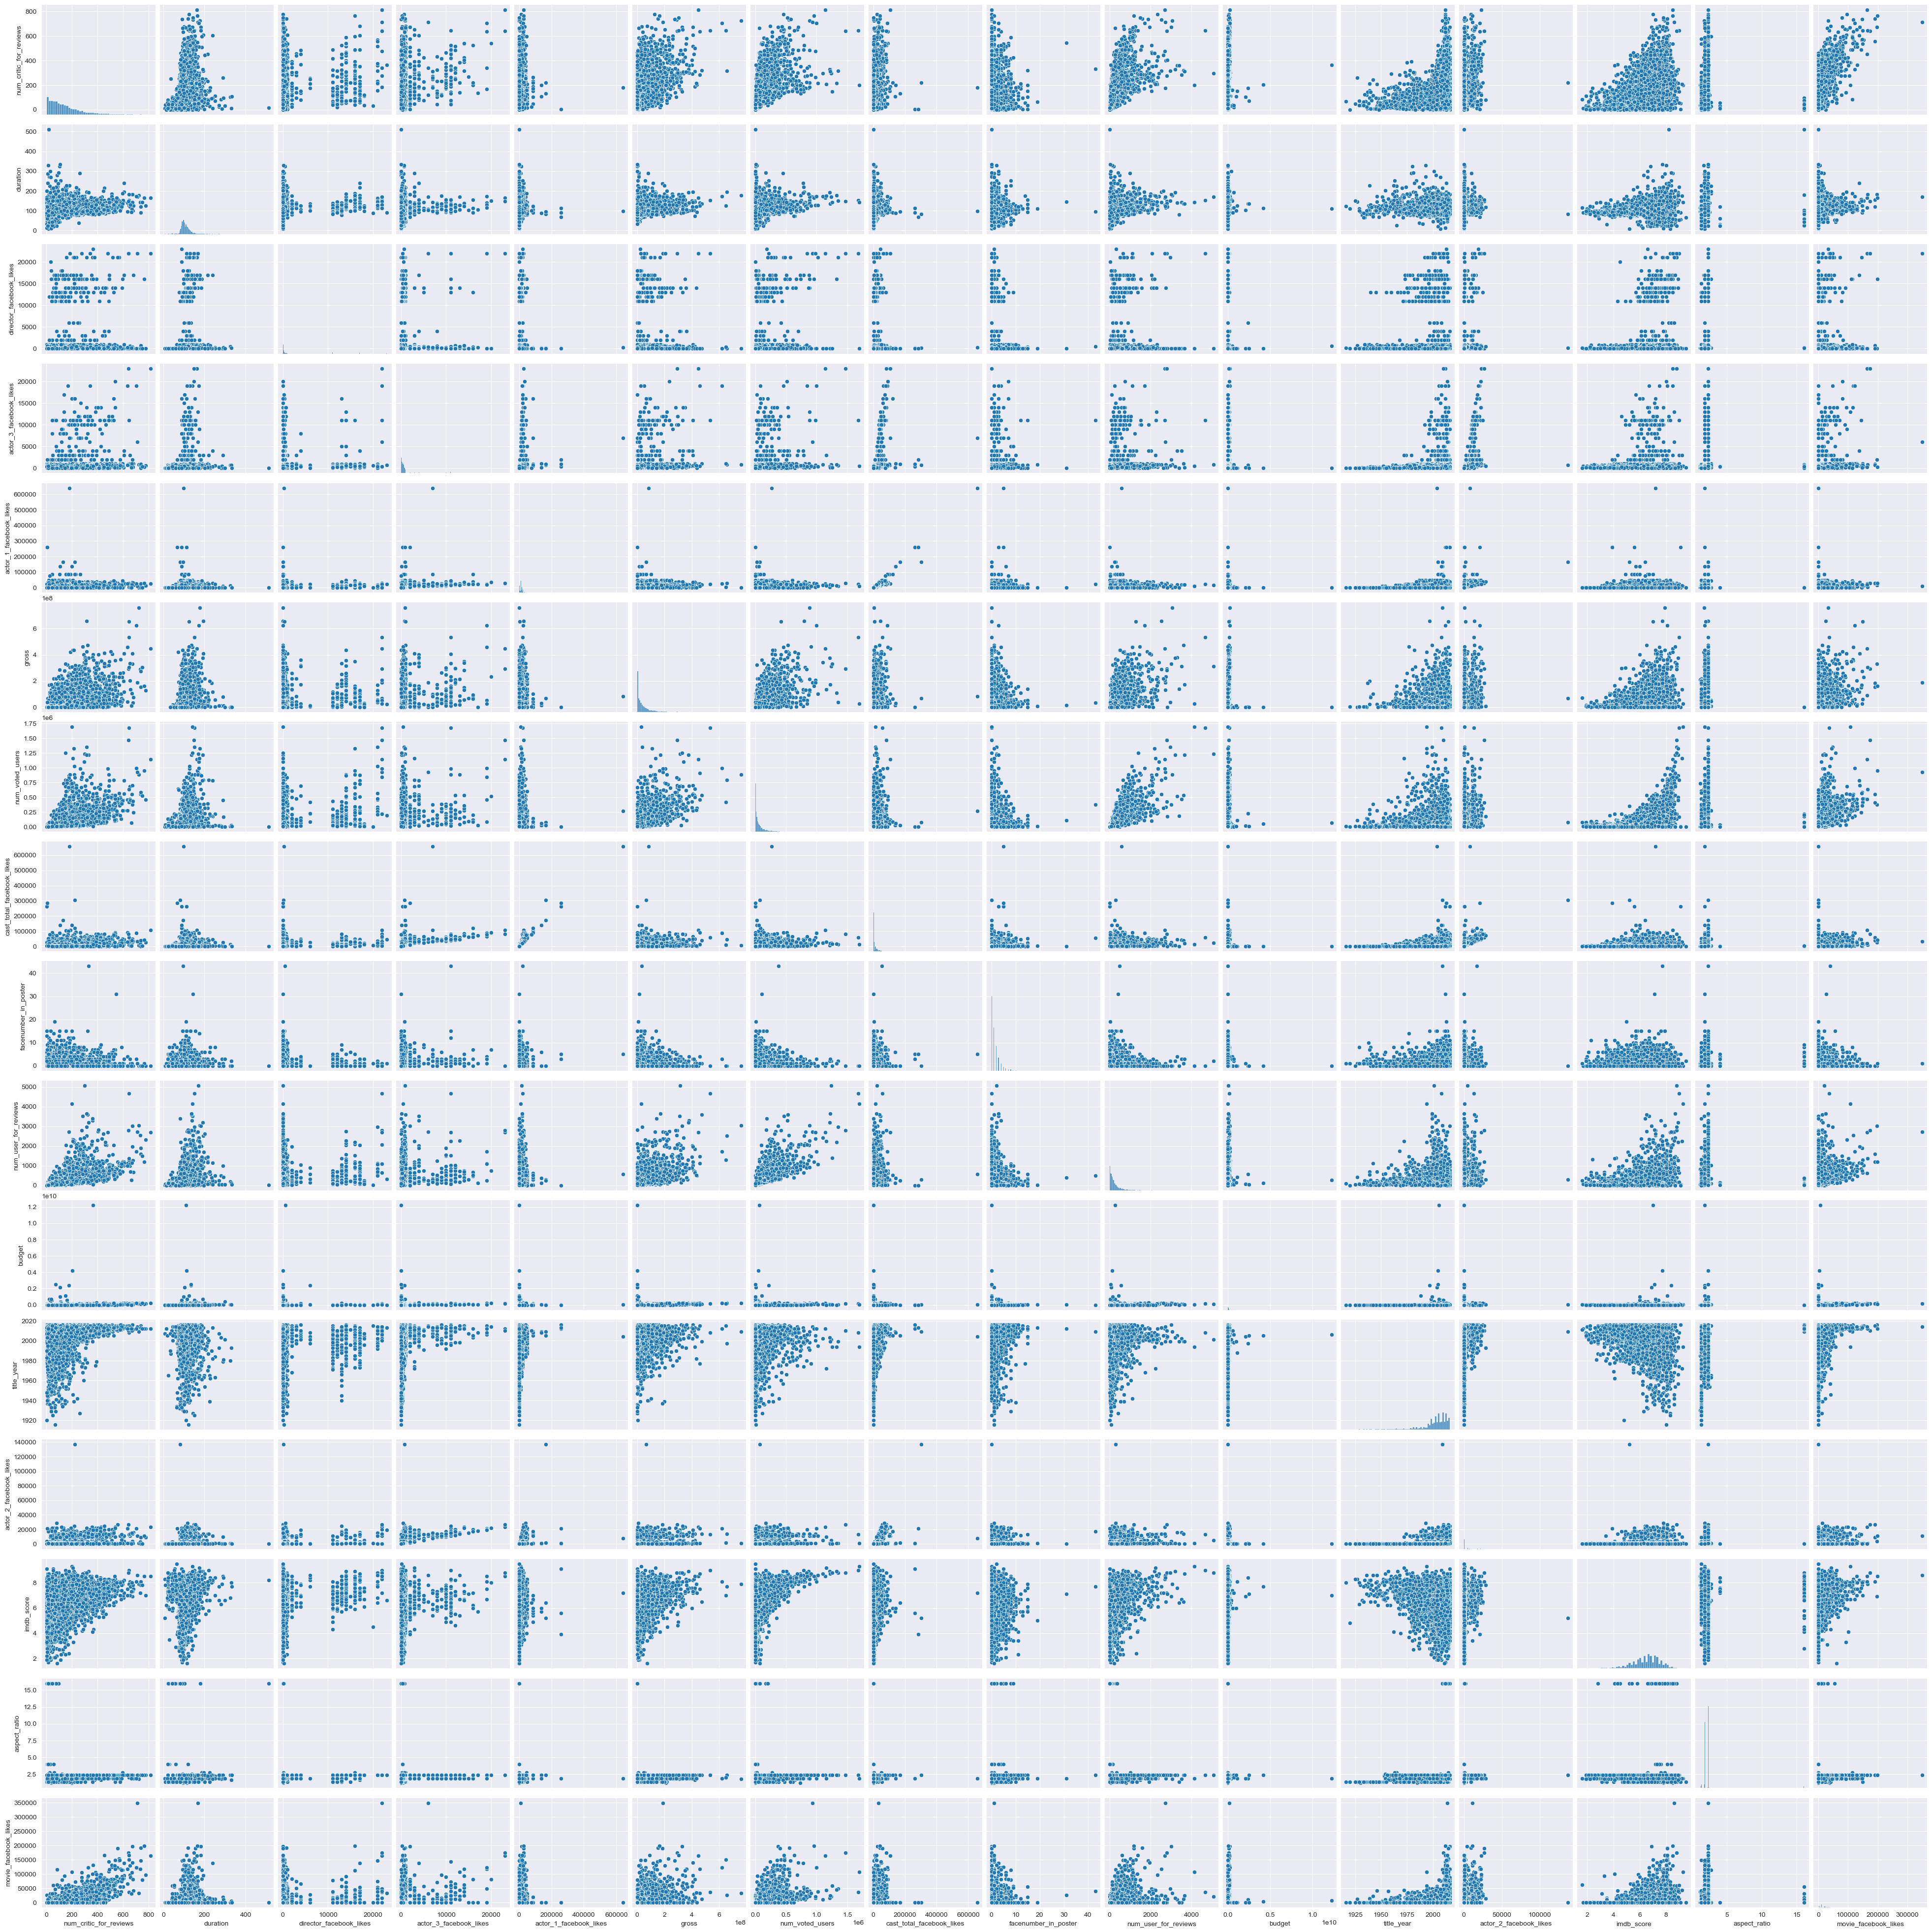

In [123]:
sns.pairplot(data=df)
# data visualization

Pie plot for IMDB top 10

<Axes: ylabel='count'>

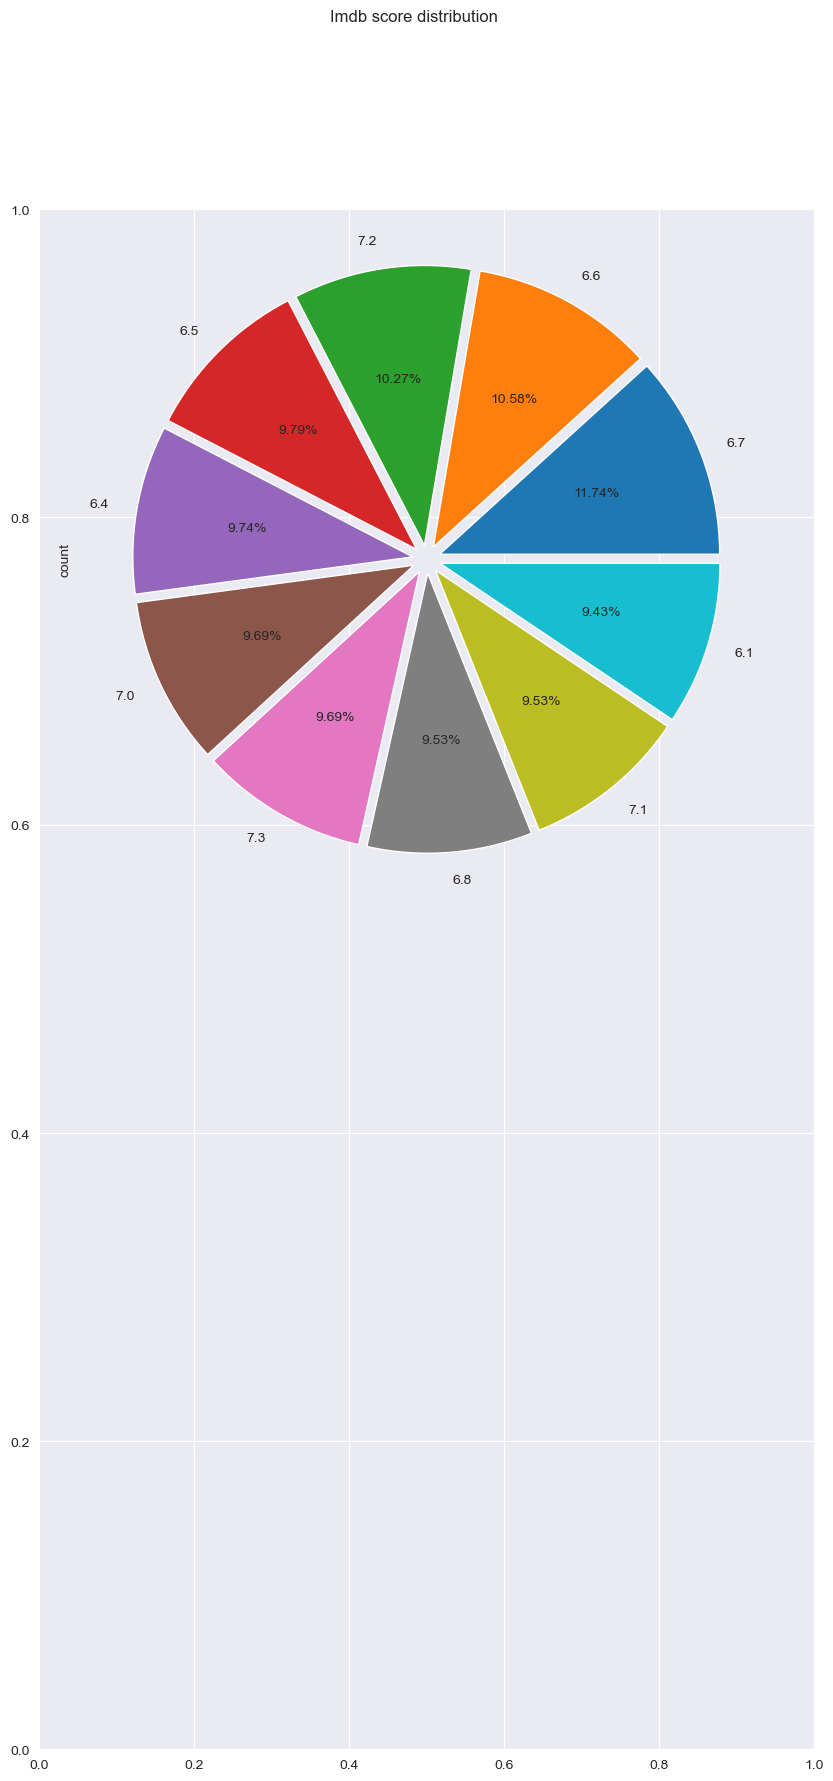

In [124]:
f,ax=plt.subplots(figsize=(10,20))
ax1=plt.subplot(211)
f.suptitle("Imdb score distribution")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
df['imdb_score'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)
# pie plot for top 10 Imdb_scores
# Around 11.74 percent of the data has a imdb_score  which is 6.7

Using Dsitribution Plot

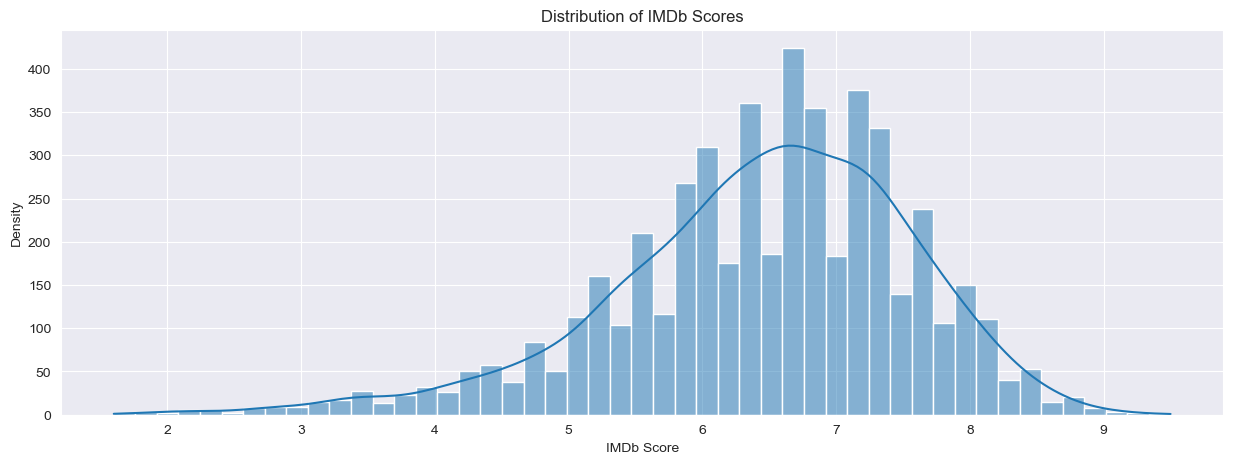

In [125]:
# Distribution plot for all prices
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
f, ax = plt.subplots(figsize=(15, 5))

# Plot the distribution of IMDb scores
sns.histplot(df['imdb_score'], kde=True, ax=ax)

# Set the title and labels
ax.set_title('Distribution of IMDb Scores')
ax.set_xlabel('IMDb Score')
ax.set_ylabel('Density')

# Show the plot
plt.show()

# using distribution plot we can see that the imdb score is the highest at a imdb score which is between 6 and 8


Visualizing the count of languages in the dataset

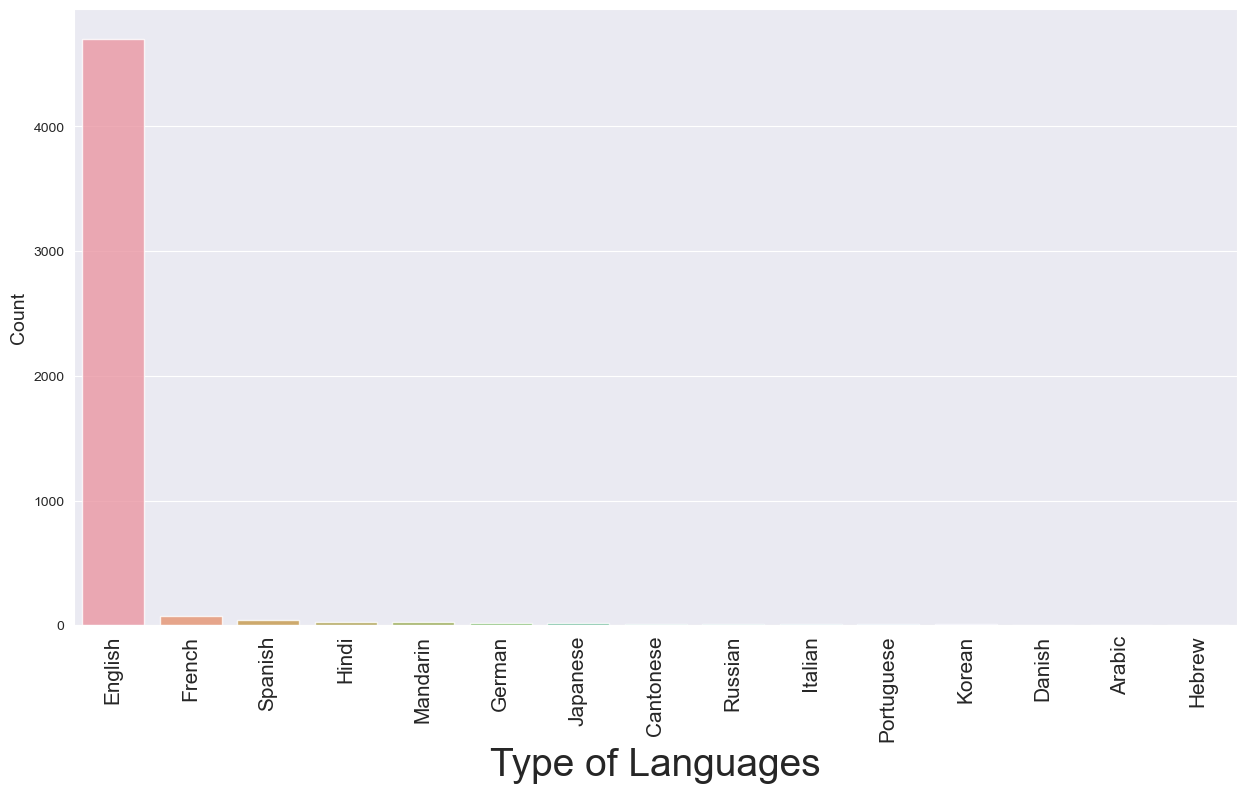

In [126]:

# Set the style for the plot
sns.set_style("darkgrid")

# Get the top 15 languages and their counts
ls = df['language'].value_counts().head(15).sort_values(ascending=False)

# Create a figure for the bar plot
plt.figure(figsize=(15, 8))

# Create the bar plot
temp = sns.barplot(x=ls.index, y=ls.values, alpha=0.8)

# Set the labels for the axes
plt.ylabel('Count', fontsize=14)
plt.xlabel('Type of Languages', fontsize=28)

# Rotate the x-axis labels for better readability
temp.set_xticklabels(labels=ls.index, rotation=90, fontsize=15)

# Show the plot
plt.show()

# Visualizing the count of languages in the dataset.


Visualizing the directors names present in the dataset

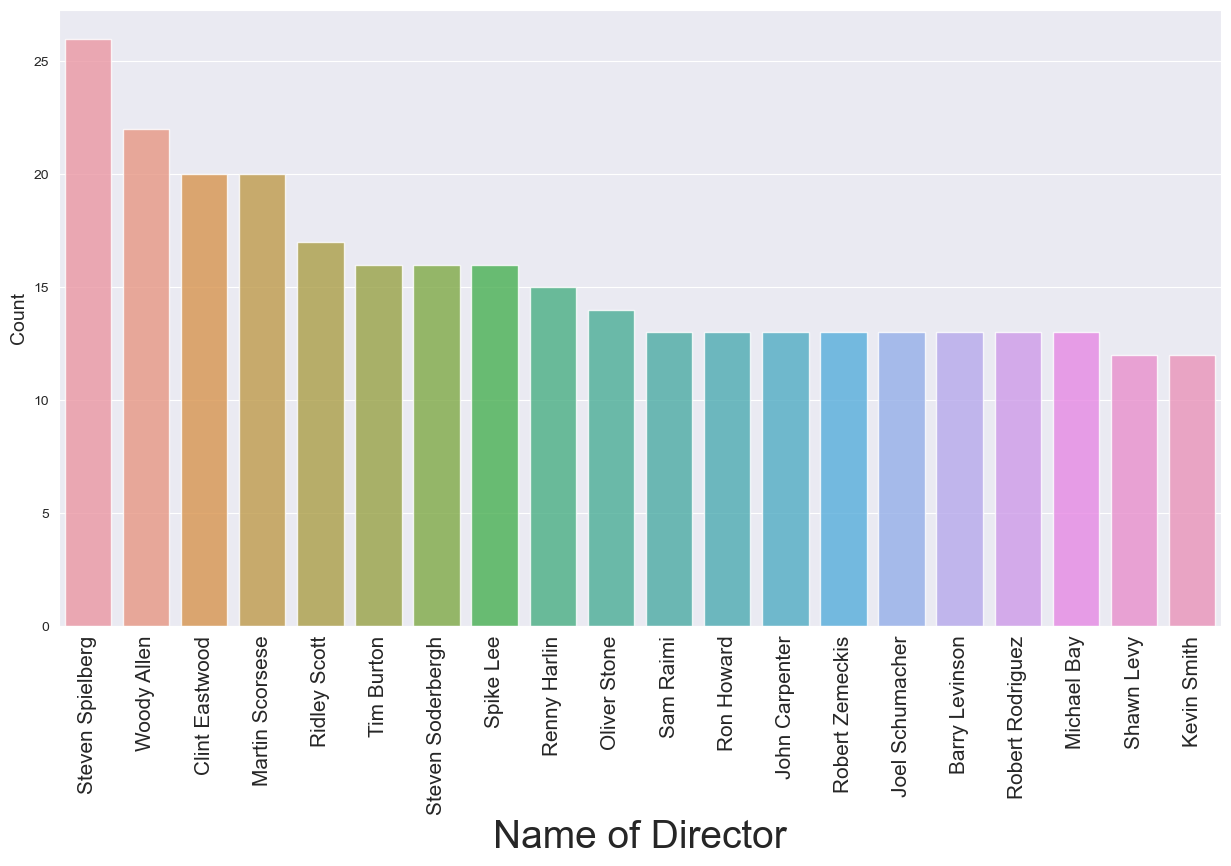

In [127]:

# Set the style for the plot
sns.set_style("darkgrid")

# Get the top 15 languages and their counts
ls = df['director_name'].value_counts().head(20).sort_values(ascending=False)

# Create a figure for the bar plot
plt.figure(figsize=(15, 8))

# Create the bar plot
temp = sns.barplot(x=ls.index, y=ls.values, alpha=0.8)

# Set the labels for the axes
plt.ylabel('Count', fontsize=14)
plt.xlabel('Name of Director', fontsize=28)

# Rotate the x-axis labels for better readability
temp.set_xticklabels(labels=ls.index, rotation=90, fontsize=15)

# Show the plot
plt.show()

# Visualizing the count of languages in the dataset.


Visualizing the barplot of countries and the imdb scores

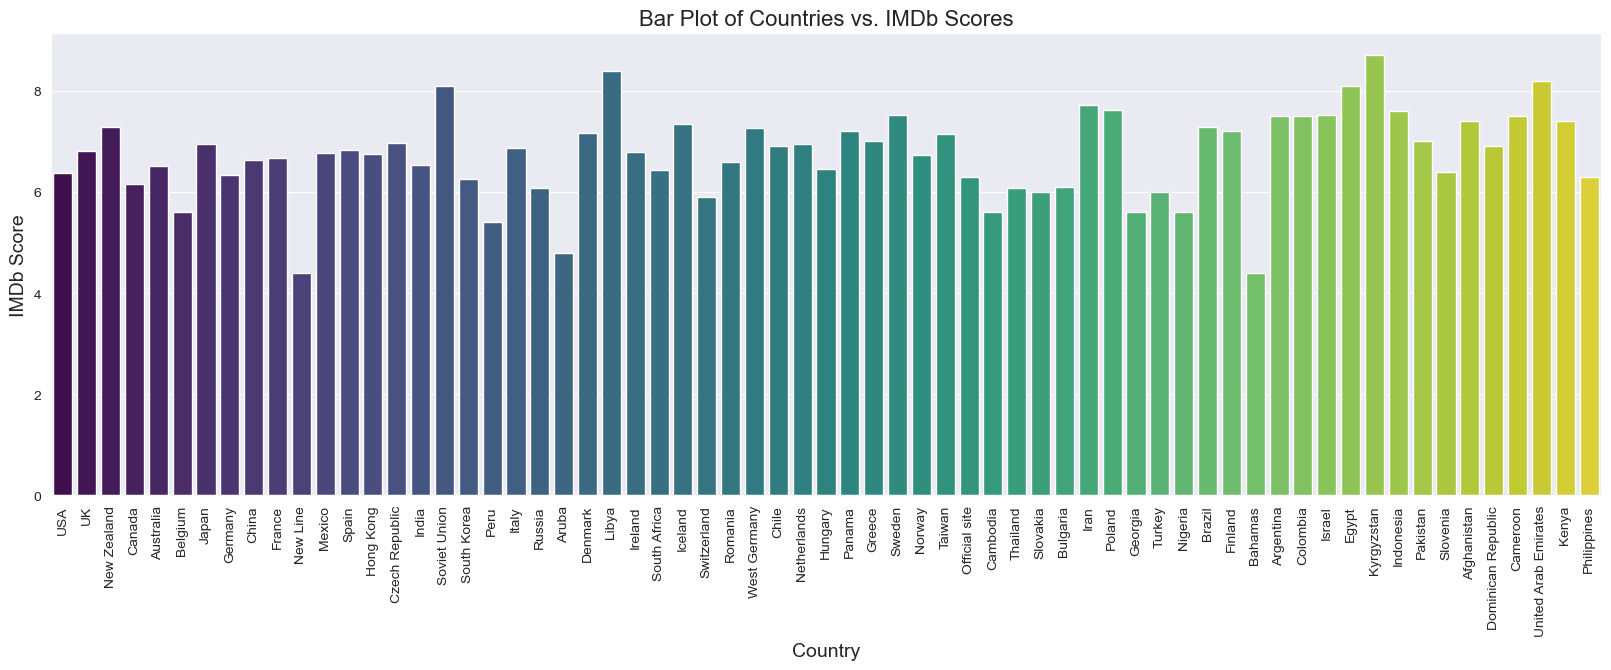

In [128]:

# Set the figure size
plt.figure(figsize=(20, 6))

# Create a bar plot of countries versus IMDb scores
sns.barplot(x='country', y='imdb_score', data=df, ci=None, palette="viridis")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title for better context
plt.xlabel('Country', fontsize=14)
plt.ylabel('IMDb Score', fontsize=14)
plt.title('Bar Plot of Countries vs. IMDb Scores', fontsize=16)

# Show the plot
plt.show()

# Visualizing the barplot of countries and the imdb scores

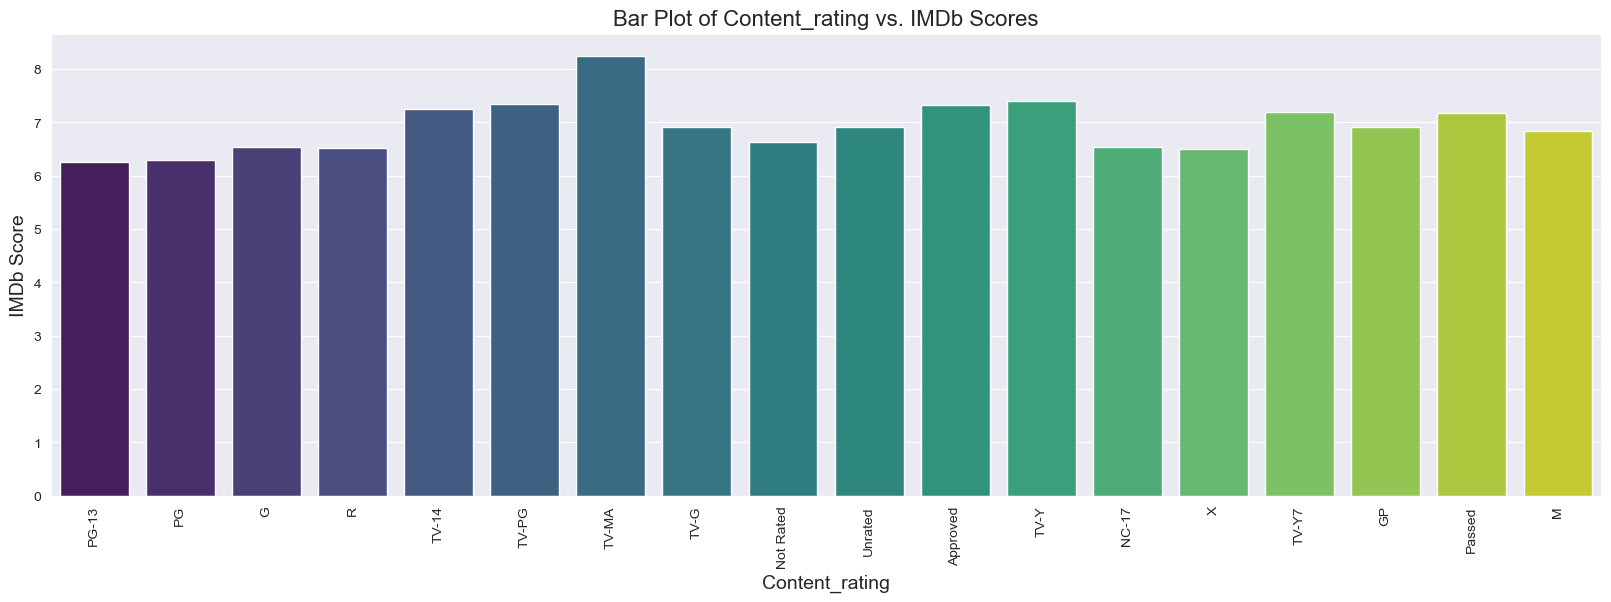

In [129]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Create a bar plot of countries versus IMDb scores
sns.barplot(x='content_rating', y='imdb_score', data=df, ci=None, palette="viridis")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title for better context
plt.xlabel('Content_rating', fontsize=14)
plt.ylabel('IMDb Score', fontsize=14)
plt.title('Bar Plot of Content_rating vs. IMDb Scores', fontsize=16)

# Show the plot
plt.show()

**# Removing NULL Values**

In [130]:
df=df.dropna()
# dropping the null values

In [131]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

Now we drop some irrelevant columns and view the data

In [132]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [133]:
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster','plot_keywords','actor_3_name',
'movie_imdb_link','aspect_ratio','language'])

In [134]:
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,3924,776,39.0,France,R,4500.0,2004.0,133.0,6.9,171
5027,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,4555,5,26.0,Iran,Not Rated,10000.0,2000.0,0.0,7.5,697
5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,72639,368,371.0,USA,PG-13,7000.0,2004.0,45.0,7.0,19000
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,52055,147,130.0,USA,R,7000.0,1992.0,20.0,6.9,0


In [135]:
df.shape

(3755, 20)

Label Encoding Categorical Data

In [136]:
cat_cols=['content_rating','director_name','genres','actor_1_name','actor_2_name','country']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes    
## We have  label encoded the categorical columns in the dataset and transformed them to numeric values.

director_name                  int32
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                   int32
actor_1_facebook_likes       float64
gross                        float64
genres                         int32
actor_1_name                   int32
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
country                        int32
content_rating                 int32
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
dtype: object

Log Transformation

In [137]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [142]:
skewed_features=['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']
# selecting all feautures which are skewed and storing them in the skewed_features

In [143]:
import numpy as np

# Apply log transformation to skewed features
for i in skewed_features:
    df[i] = np.log(df[i] + 1)


Splitting Dataset

In [144]:
X=df.drop(labels=['imdb_score'],axis=1)
Y=df['imdb_score']
X.head()
# splitting the data into dependent and independent variables

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,0.742181,0.745403,0.711786,0.000000,0.748809,0.751915,0.751895,0.876546,0.691380,0.713450,0.835057,0.778647,0.771558,3.78419,2.079442,19.283571,7.605890,6.842683,10.404293
1,0.739119,0.725683,0.710327,0.740109,0.751895,0.760539,0.805843,0.872128,0.689100,0.744312,0.829843,0.807935,0.755959,3.78419,2.079442,19.519293,7.604894,8.517393,0.000000
2,0.758151,0.741552,0.706511,0.000000,0.708947,0.762660,0.790175,0.869891,0.696632,0.721718,0.825161,0.790987,0.751778,3.76120,2.079442,19.316769,7.608871,5.976351,11.350418
3,0.721011,0.747798,0.709474,0.798914,0.799447,0.731227,0.801347,0.873979,0.720173,0.757413,0.837079,0.816186,0.769573,3.78419,2.079442,19.336971,7.607381,10.043293,12.007628
5,0.677979,0.735732,0.703119,0.736357,0.738791,0.763064,0.742855,0.864461,0.696032,0.727259,0.822771,0.763411,0.745826,3.78419,2.079442,19.390323,7.607381,6.450470,10.085851


In [145]:
Y.head()

0    2.186051
1    2.091864
2    2.054124
3    2.251292
5    2.028148
Name: imdb_score, dtype: float64

In [146]:
# Train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3004, 19) (751, 19) (3004,) (751,)


**Machine Learning**

Linear Regression

In [147]:
lm=LinearRegression()
lm= lm.fit(X_train,Y_train)

#   Traindata predictions
train_pred= lm.predict(X_train)

test_pred= lm.predict(X_test)

RMSE_test= np.sqrt(mean_squared_error(Y_test,test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print('RSquared value on train: ',lm.score(X_train,Y_train))
print('RSquared value on test: ',lm.score(X_test,Y_test))



RMSE TrainingData =  0.12268210393988863
RMSE TestData =  0.12768645039577003
--------------------------------------------------
RSquared value on train:  0.38450912699393347
RSquared value on test:  0.3102719157449416


In [148]:
errors= abs(test_pred-Y_test)
# calculating errors for using error values in mean absolute percentage errors

In [149]:
# calculate mean absolute percentage error(MAPE)
mape= 100*(errors/Y_test)

accuracy=100-np.mean(mape)
print('Accuracy:',round(accuracy,2),'%')

Accuracy: 95.24 %


Decision Tree Regressor

In [153]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

train_preds=DT.predict(X_train)

test_preds=DT.predict(X_test)

RMSE_test= np.sqrt(mean_squared_error(Y_test,test_preds))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_preds))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print('RSquared value on train: ',DT.score(X_train,Y_train))
print('RSquared value on test: ',DT.score(X_test,Y_test))


RMSE TrainingData =  0.0835555034762491
RMSE TestData =  0.12460254486649441
--------------------------------------------------
RSquared value on train:  0.7144978996704383
RSquared value on test:  0.3431864454935156


In [154]:
errors= abs(test_preds-Y_test)
# calculating errors for using error values in mean absolute percentage errors

In [155]:
# calculate mean absolute percentage error(MAPE)
mape= 100*(errors/Y_test)

accuracy=100-np.mean(mape)
print('Accuracy:',round(accuracy,2),'%')

Accuracy: 95.46 %


Random Forest Regressor

In [156]:
RF=RandomForestRegressor().fit(X_train,Y_train)

train_preds1=RF.predict(X_train)

test_preds1=RF.predict(X_test)

RMSE_test= np.sqrt(mean_squared_error(Y_test,test_preds1))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_preds1))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print('RSquared value on train: ',RF.score(X_train,Y_train))
print('RSquared value on test: ',RF.score(X_test,Y_test))

RMSE TrainingData =  0.041319276066681544
RMSE TestData =  0.10082262692516607
--------------------------------------------------
RSquared value on train:  0.9301824516669553
RSquared value on test:  0.5699645091818075


In [157]:
errors= abs(test_preds1-Y_test)
# calculating errors for using error values in mean absolute percentage errors

In [158]:
# calculate mean absolute percentage error(MAPE)
mape= 100*(errors/Y_test)

accuracy=100-np.mean(mape)
print('Accuracy:',round(accuracy,2),'%')

Accuracy: 96.28 %
